In [ ]:
!pip install moabb
!pip install mne==1.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.7/231.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 13.2 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=1a78ff250bb2641f332bd67edd9906ff80d8096a4131322026387f4e35df12bb
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc

In [ ]:
!nvidia-smi

Wed Aug 21 22:37:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8                2W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Análise espectral

### P300

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from moabb.datasets import Cattan2019_PHMD
from moabb.paradigms import RestingStateToP300Adapter


warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
C:\Users\machi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


C:\Users\machi\anaconda3\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [ ]:
# Select channel and subject for the remaining of the example.
channel = "Cz"
subject = 10

dataset = Cattan2019_PHMD()
events = ["on", "off"]
paradigm = RestingStateToP300Adapter(events=events, channels=[channel])

In [ ]:
f, S, _, y = paradigm.psd(subject, dataset)

AttributeError: 'SSVEP' object has no attribute 'psd'

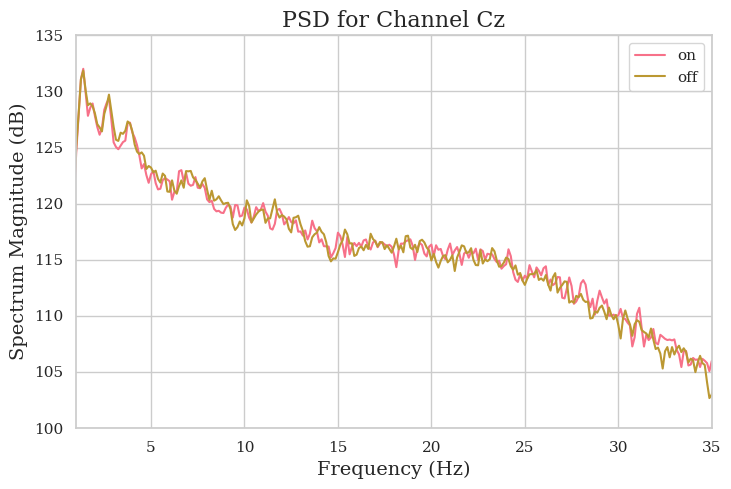

In [ ]:
fig, ax = plt.subplots(facecolor="white", figsize=(8.2, 5.1))
for condition in events:
    mean_power = np.mean(S[y == condition], axis=0).flatten()
    ax.plot(f, 10 * np.log10(mean_power), label=condition)

ax.set_xlim(paradigm.fmin, paradigm.fmax)
ax.set_ylim(100, 135)
ax.set_ylabel("Spectrum Magnitude (dB)", fontsize=14)
ax.set_xlabel("Frequency (Hz)", fontsize=14)
ax.set_title("PSD for Channel " + channel, fontsize=16)
ax.legend()
fig.show()

### PSD SSVEP

### Download dataset

In [ ]:
# Dowbnload dataset since something is bronken in the lib
import urllib.request
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm

# subjects = np.arange(1, 36)
# urls = [f"http://bci.med.tsinghua.edu.cn/upload/yijun/S{str(s)}.mat.7z" for s in subjects]
# for url in tqdm(urls):
#   urllib.request.urlretrieve(url, f"C:\\Users\\machi\\Downloads\\{url.split('/')[-1]}")
# print("File downloaded successfully!")
# urls

In [ ]:
!pip install py7zr
import py7zr

   ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
   ---------------------------------------- 67.6/67.6 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/357.3 kB ? eta -:--:--
   --------------------------------------- 357.3/357.3 kB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------- ----------------------- 0.7/1.8 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 18.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 16.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.1 kB ? eta -:--:--
   ---------------------------------------- 46.1/46.1 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/245.7 kB ? eta -:--:--
   --------------------------------------- 245.7/245.7 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1

  You can safely remove it manually.


In [ ]:

import shutil
from pyunpack import Archive


In [ ]:
import py7zr
subjects = np.arange(21, 36)
donwloaded_files =

  [f"C:\\Users\\machi\\Downloads\\S{i}.mat.7z" for i in subjects]
for d, i in tqdm(zip(donwloaded_files, subjects)):
  with py7zr.SevenZipFile(d, 'r') as archive:
    archive.extractall(path=f"C:\\Users\\machi\\Downloads")
    shutil.move(f"C:\\Users\\machi\\Downloads\\S{i}.mat", f"C:\\Users\\machi\\mne_data\\MNE-wang-data\\pub\\ssvep_benchmark_dataset\\S{i}.mat")



0it [00:00, ?it/s]

### Test download data

In [ ]:
from moabb.paradigms import SSVEP
from moabb.pipelines import SSVEP_CCA

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
C:\Users\machi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


C:\Users\machi\anaconda3\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [ ]:
paradigm = SSVEP()
paradigm.datasets

Choosing the first None classes from all possible events
C:\Users\machi\anaconda3\Lib\site-packages\moabb\datasets\fake.py:93: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_FAKEDATASET-IMAGERY-10-2--60-60--120-120--FAKE1-FAKE2-FAKE3--C3-CZ-C4_PATH"
  set_config(key, temp_dir)
C:\Users\machi\anaconda3\Lib\site-packages\moabb\datasets\fake.py:93: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_FAKEVIRTUALREALITYDATASET-P300-21-1--60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60--120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120--TARGET-NONTARGET--C3-CZ-C4_PATH"
  set_config(key, temp_dir)


In [ ]:
from moabb.datasets import Wang2016

In [ ]:
channel = "Oz"
events = ["8", "15"]
dataset = Wang2016()

In [ ]:
paradigm = SSVEP(channels=[channel], events=events, n_classes=2)
freqs = paradigm.used_events(dataset)
X, y, _ = paradigm.get_data(dataset)

Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy expli

In [ ]:
X.shape

(408, 1, 1251)

In [ ]:
from scipy.signal import welch
def psd(paradigm, subject, dataset):
    X, y, _ = paradigm.get_data(dataset, [subject])
    f, S = welch(X, axis=-1, nperseg=1024, fs=250)
    return (f, S, X, y)


In [ ]:
f, S, _, y = psd(paradigm, subject, dataset)

Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))


In [ ]:
import matplotlib.pyplot as plt


C:\Users\machi\AppData\Local\Temp\ipykernel_14460\1468363745.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


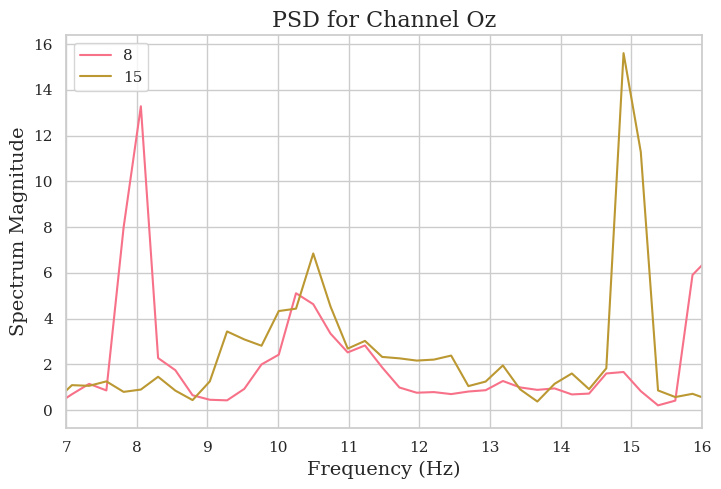

In [ ]:
fig, ax = plt.subplots(facecolor="white", figsize=(8.2, 5.1))
for condition in events:
    mean_power = np.mean(S[y == condition], axis=0).flatten()
    ax.plot(f, mean_power , label=condition)

ax.set_xlim(7, 16)

ax.set_ylabel("Spectrum Magnitude", fontsize=14)
ax.set_xlabel("Frequency (Hz)", fontsize=14)
ax.set_title("PSD for Channel " + channel, fontsize=16)
ax.legend()
fig.show()

# Classificação

In [ ]:

import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import Kalunga2016
from moabb.evaluations import CrossSubjectEvaluation
from moabb.paradigms import SSVEP, FilterBankSSVEP
from moabb.pipelines import SSVEP_CCA, SSVEP_TRCA, ExtendedSSVEPSignal, SSVEP_MsetCCA

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
C:\Users\machi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


C:\Users\machi\anaconda3\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [ ]:
interval = dataset.interval
interval

[0.5, 5.5]

In [ ]:
freqs = paradigm.used_events(dataset)
freqs

{'8': 1, '15': 8}

In [ ]:
pipelines = {}
pipelines["CCA"] = make_pipeline(SSVEP_CCA(interval=interval, freqs=freqs, n_harmonics=4))

In [ ]:
overwrite = True  # set to True if we want to overwrite cached results

CrossSubjectEvaluation(
    paradigm=paradigm, datasets=dataset, overwrite=overwrite
)
results = evaluation.process(pipelines)

Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
Trial data de-meaned and concatenated with a buffer to create continuous data
C:\Users\machi\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy expli

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
results